In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("cashback_cleaned.csv")

In [3]:
pd.set_option('display.max_columns', None) # чтобы видеть все столбцы при выводе таблицы

In [4]:
df['restaurants'].isnull().sum()

12190

In [5]:
(df.loc[:, ['act_pharmacy', 'act_restaurants',
       'act_clothes', 'act_car_service', 'act_supermarkets', 'act_taxi',
       'act_beauty', 'act_entertainment', 'act_railway', 'act_education',
       'act_house', 'act_sports_goods', 'act_pets', 'act_flowers',
       'act_fastfood', 'act_carsharing', 'act_rent_car']].sum(axis=1) > 4).sum()

0

In [6]:
df

,client_id,region,city,age,sex,month,total,total_cashback,pharmacy,restaurants,clothes,car_service,supermarkets,taxi,beauty,entertainment,railway,education,house,sports_goods,pets,flowers,fastfood,carsharing,rent_car,act_pharmacy,act_restaurants,act_clothes,act_car_service,act_supermarkets,act_taxi,act_beauty,act_entertainment,act_railway,act_education,act_house,act_sports_goods,act_pets,act_flowers,act_fastfood,act_carsharing,act_rent_car,back_pharmacy,back_restaurants,back_clothes,back_car_service,back_supermarkets,back_taxi,back_beauty,back_entertainment,back_railway,back_education,back_house,back_sports_goods,back_pets,back_flowers,back_fastfood,back_carsharing,back_rent_car
0,1889,Москва,Москва,50,M,2023-04-01,769455.0,21186.0,18993.0,99900.0,3294.0,NaN,397450.0,86037.0,96570.0,27420.0,NaN,NaN,9112.0,2100.0,NaN,660.0,27919.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,864.0,486.0,NaN,NaN,19836.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1889,Москва,Москва,50,M,2023-05-01,817209.0,16161.0,37807.0,92424.0,NaN,6750.0,219394.0,109221.0,80520.0,76950.0,NaN,NaN,63936.0,5550.0,37147.0,NaN,87510.0,NaN,NaN,1.0,NaN,NaN,0.0,1.0,NaN,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1884.0,NaN,NaN,NaN,10614.0,NaN,3663.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1889,Москва,Москва,50,M,2023-06-01,1059606.0,24009.0,20791.0,124800.0,51246.0,67490.0,479201.0,100395.0,66165.0,113100.0,NaN,NaN,16413.0,4215.0,8122.0,NaN,7668.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,21.0,2025.0,NaN,NaN,21963.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1889,Москва,Москва,50,M,2023-07-01,1158324.0,28086.0,131129.0,18060.0,78120.0,2400.0,532117.0,63909.0,59280.0,NaN,NaN,NaN,240492.0,NaN,18297.0,NaN,14520.0,NaN,NaN,1.0,1.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,6033.0,NaN,NaN,NaN,22053.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1889,Москва,Москва,50,M,2023-08-01,1104241.0,22584.0,44096.0,198480.0,19080.0,147705.0,286070.0,69279.0,178920.0,NaN,NaN,NaN,58884.0,13200.0,NaN,NaN,88527.0,NaN,NaN,0.0,0.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13491.0,NaN,9093.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57493,1005319581,Москва,Москва,37,NaN,2023-05-01,174758.0,0.0,657.0,54375.0,NaN,NaN,42113.0,46719.0,NaN,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,24894.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57494,1005319581,Москва,Москва,37,NaN,2023-06-01,273375.0,5634.0,NaN,128070.0,NaN,NaN,37164.0,86751.0,1800.0,5400.0,NaN,NaN,NaN,NaN,NaN,NaN,14190.0,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5364.0,NaN,NaN,NaN,NaN,NaN,270.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57495,1005319581,Москва,Москва,37,NaN,2023-07-01,168676.0,2907.0,5919.0,26085.0,NaN,NaN,32419.0,31272.0,NaN,27300.0,2700.0,NaN,2997.0,NaN,NaN,NaN,39984.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1542.0,NaN,1365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57496,1005319581,Москва,Москва,37,NaN,2023-08-01,205576.0,2427.0,1705.0,111690.0,NaN,NaN,16539.0,47529.0,1950.0,2778.0,NaN,NaN,NaN,NaN,NaN,NaN,23385.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,2343.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Узнать то, насколько менялся выбор кэшбэка от месяца к месяцу

In [4]:
df1 = df.groupby('client_id')[['act_pharmacy', 'act_restaurants',
       'act_clothes', 'act_car_service', 'act_supermarkets', 'act_taxi',
       'act_beauty', 'act_entertainment', 'act_railway', 'act_education',
       'act_house', 'act_sports_goods', 'act_pets', 'act_flowers',
       'act_fastfood', 'act_carsharing', 'act_rent_car']].sum().astype(int)

In [21]:
df1

,act_pharmacy,act_restaurants,act_clothes,act_car_service,act_supermarkets,act_taxi,act_beauty,act_entertainment,act_railway,act_education,act_house,act_sports_goods,act_pets,act_flowers,act_fastfood,act_carsharing,act_rent_car
client_id,,,,,,,,,,,,,,,,,
1889,4,3,0,0,6,0,3,0,0,0,1,0,0,0,0,0,0
2213,2,1,2,0,4,0,0,1,1,2,0,0,1,0,0,0,0
191765,1,1,3,2,1,0,1,0,1,0,0,0,4,0,0,0,0
256820,5,0,2,2,1,0,5,1,0,0,0,0,0,2,0,0,0
282534,3,3,3,0,0,0,5,0,0,0,0,0,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002982745,4,0,2,0,0,0,1,0,0,0,0,0,0,2,0,0,0
1002997975,4,0,1,0,0,1,0,4,2,0,0,0,0,0,0,0,0
1003172384,3,2,1,1,0,0,0,2,0,0,0,0,1,0,0,0,0


In [22]:
actCols = df1.columns
data = []
data1 = []

In [23]:
actCols

Index(['act_pharmacy', 'act_restaurants', 'act_clothes', 'act_car_service',
       'act_supermarkets', 'act_taxi', 'act_beauty', 'act_entertainment',
       'act_railway', 'act_education', 'act_house', 'act_sports_goods',
       'act_pets', 'act_flowers', 'act_fastfood', 'act_carsharing',
       'act_rent_car'],
      dtype='object')

In [24]:
for i in range(17):
  data.append(df1.iloc[:, i].loc[(2 <= df1.iloc[:, i]) & (df1.iloc[:, i] <= 4)].count())
  data1.append(df1.iloc[:, i].loc[(2 <= df1.iloc[:, i]) & (df1.iloc[:, i] <= 4)].index)
data1

[Int64Index([      1889,       2213,     282534,     283148,     331214,
                 405465,     861276,     935564,    1015614,    1041833,
             ...
             1002531915, 1002546432, 1002596705, 1002607234, 1002620484,
             1002982745, 1002997975, 1003172384, 1003493065, 1005319581],
            dtype='int64', name='client_id', length=4714),
 Int64Index([      1889,     282534,     283148,     286878,     582257,
                 941567,     969180,     983133,    1015614,    1041833,
             ...
              998432560,  999894498,  999916737,  999927292, 1000436510,
             1002527558, 1002596705, 1002620484, 1003172384, 1005319581],
            dtype='int64', name='client_id', length=4187),
 Int64Index([      2213,     191765,     256820,     282534,     283148,
                 286878,     378992,     582257,     861276,    1015614,
             ...
              999210143,  999927292, 1000325361, 1000364011, 1000436510,
             1000552110, 1

In [30]:
actSer = pd.Series(data, index=actCols)
actSer.sort_values(ascending=False, inplace=True)

In [31]:
actSer = actSer.to_frame()

In [33]:
actSer

,0
act_pharmacy,4714
act_restaurants,4187
act_clothes,4001
act_entertainment,3537
act_beauty,2936
act_supermarkets,1832
act_car_service,1792
act_taxi,1566
act_railway,1477
act_sports_goods,1295


In [34]:
plt.style.use("dark_background")
cols = ['gold'] * 11 + ['white'] * 6

In [35]:
rc = {'figure.figsize':(12,5),
      'axes.grid' : True,
      'font.size' : 15}
plt.rcParams.update(rc)
plt.tight_layout()

<Figure size 1200x500 with 0 Axes>

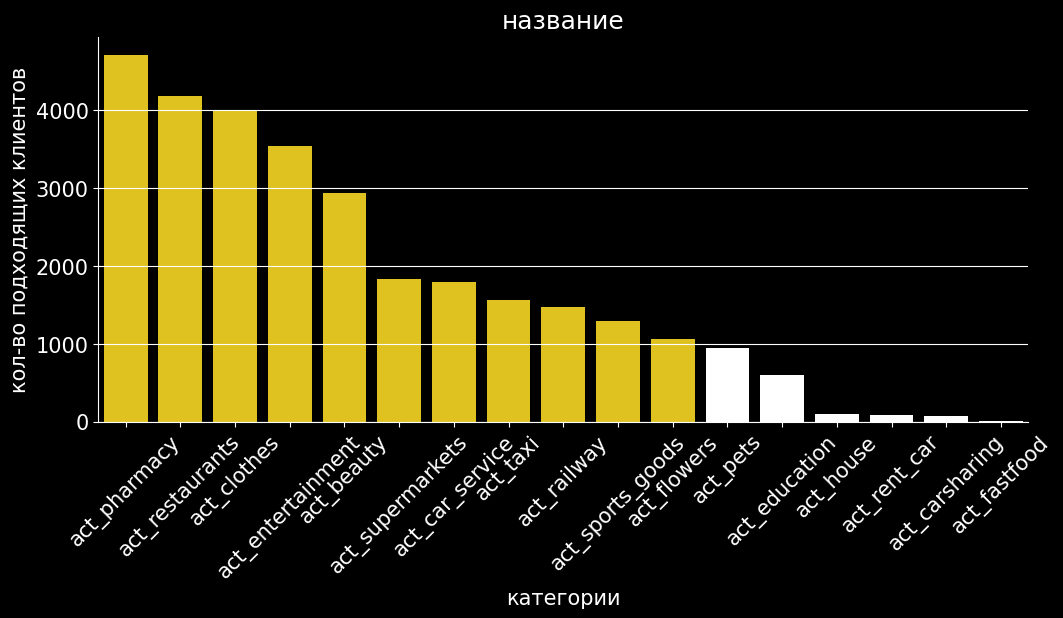

In [42]:
bars = sns.barplot(x=actSer.index, y=actSer[0], data=actSer, errorbar=None, palette=cols)
bars.set(xlabel='категории', ylabel='кол-во подходящих клиентов', title='Количество подходящих клиентво по категориям')
bars.tick_params(axis='x', rotation=45)
sns.despine()
plt.savefig("aaa.svg")
plt.show()

<Figure size 1000x700 with 0 Axes>

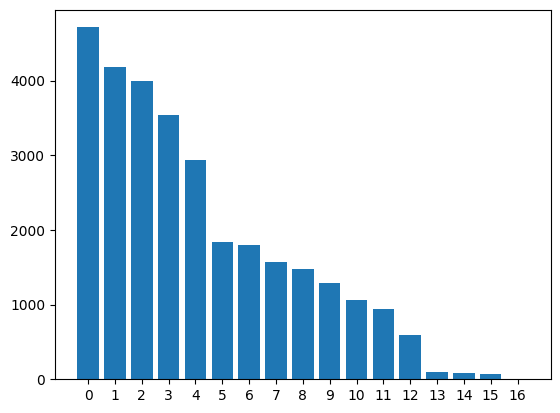

In [ ]:
indexes = [str(i) for i in range(17)]
plt.bar(indexes, actSer)
plt.show()

In [ ]:
colors = ['g' if c >= 0 else 'r' for c in coefs]
g = sns.barplot(
    x=words,
    y=coefs,
    palette=colors
)

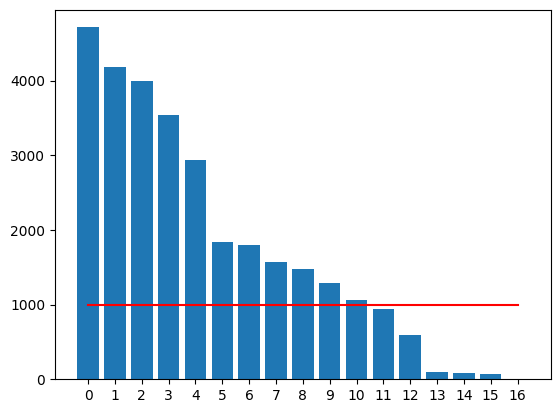

In [ ]:
plt.bar(indexes, actSer)
plt.plot(indexes, [1000]*17, color='red')
plt.show()

In [ ]:
list(actSer.index)

['act_pharmacy',
 'act_restaurants',
 'act_clothes',
 'act_entertainment',
 'act_beauty',
 'act_supermarkets',
 'act_car_service',
 'act_taxi',
 'act_railway',
 'act_sports_goods',
 'act_flowers',
 'act_pets',
 'act_education',
 'act_house',
 'act_rent_car',
 'act_carsharing',
 'act_fastfood']

In [ ]:
for i in range(17):
  print(list(actSer.index)[i], ' - ', i)

act_pharmacy  -  0
act_restaurants  -  1
act_clothes  -  2
act_entertainment  -  3
act_beauty  -  4
act_supermarkets  -  5
act_car_service  -  6
act_taxi  -  7
act_railway  -  8
act_sports_goods  -  9
act_flowers  -  10
act_pets  -  11
act_education  -  12
act_house  -  13
act_rent_car  -  14
act_carsharing  -  15
act_fastfood  -  16


In [ ]:
ids = pd.DataFrame(data=dict(zip(list(actSer.index), range(17))))

ValueError: ignored

In [ ]:
data1

[Int64Index([      1889,       2213,     282534,     283148,     331214,
                 405465,     861276,     935564,    1015614,    1041833,
             ...
             1002531915, 1002546432, 1002596705, 1002607234, 1002620484,
             1002982745, 1002997975, 1003172384, 1003493065, 1005319581],
            dtype='int64', name='client_id', length=4714),
 Int64Index([      1889,     282534,     283148,     286878,     582257,
                 941567,     969180,     983133,    1015614,    1041833,
             ...
              998432560,  999894498,  999916737,  999927292, 1000436510,
             1002527558, 1002596705, 1002620484, 1003172384, 1005319581],
            dtype='int64', name='client_id', length=4187),
 Int64Index([      2213,     191765,     256820,     282534,     283148,
                 286878,     378992,     582257,     861276,    1015614,
             ...
              999210143,  999927292, 1000325361, 1000364011, 1000436510,
             1000552110, 1

In [ ]:
actCols = df1.columns
actCols

Index(['act_pharmacy', 'act_restaurants', 'act_clothes', 'act_car_service',
       'act_supermarkets', 'act_taxi', 'act_beauty', 'act_entertainment',
       'act_railway', 'act_education', 'act_house', 'act_sports_goods',
       'act_pets', 'act_flowers', 'act_fastfood', 'act_carsharing',
       'act_rent_car'],
      dtype='object')

In [ ]:
payment = ['pharmacy', 'restaurants', 'clothes', 'car_service',
       'supermarkets', 'taxi', 'beauty', 'entertainment', 'railway',
       'education', 'house', 'sports_goods', 'pets', 'flowers', 'fastfood',
       'carsharing', 'rent_car']

In [29]:
for i in range(17):
  if (len(data1[i]) > 1000):
    category = df.loc[df['client_id'].isin(data1[i])]
    for j in range(0, category.shape[0], 6):
      category1 = category.iloc[j:j + 6]
      active = category1.loc[category1[actCols[i]] == 1]
      notActive = category1.loc[category1[actCols[i]] == 0]
      print((active[payment[i]] / active['total']).mean() / (notActive[payment[i]] / notActive['total']).mean())

KeyError: ignored

In [28]:
data1

[Int64Index([      1889,       2213,     282534,     283148,     331214,
                 405465,     861276,     935564,    1015614,    1041833,
             ...
             1002531915, 1002546432, 1002596705, 1002607234, 1002620484,
             1002982745, 1002997975, 1003172384, 1003493065, 1005319581],
            dtype='int64', name='client_id', length=4714),
 Int64Index([      1889,     282534,     283148,     286878,     582257,
                 941567,     969180,     983133,    1015614,    1041833,
             ...
              998432560,  999894498,  999916737,  999927292, 1000436510,
             1002527558, 1002596705, 1002620484, 1003172384, 1005319581],
            dtype='int64', name='client_id', length=4187),
 Int64Index([      2213,     191765,     256820,     282534,     283148,
                 286878,     378992,     582257,     861276,    1015614,
             ...
              999210143,  999927292, 1000325361, 1000364011, 1000436510,
             1000552110, 1